In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
digits_traiin = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)

In [3]:
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [4]:
X_train = digits_traiin[np.arange(64)]
Y_train = digits_traiin[64]

In [7]:
X_tesy = digits_test[np.arange(64)]
Y_test = digits_test[64]

In [8]:
from sklearn.cluster import KMeans #导入Kmeans模型

In [9]:
kmeans = KMeans(n_clusters=10)#设置中心数量为10

In [10]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
y_pred = kmeans.predict(X_tesy)

In [12]:
#使用ARI进行聚类性能评估
from sklearn import metrics

In [13]:
print metrics.adjusted_rand_score(Y_test, y_pred)

0.663057794933


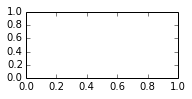

In [14]:
#利用轮廓系数评价不同类族数量
from sklearn.metrics import silhouette_score

In [15]:
#初始化原始数据点
x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X = np.array(zip(x1,x2)).reshape(len(x1),2)

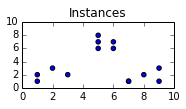

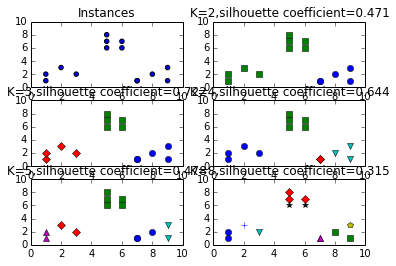

In [32]:
plt.subplot(3,2,1) #分割出3*2个子图，并在一号子图作图
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)
colors = ['b','g','r','c','m','y','k','b']
markers = ['o','s','D','v','^','p','*','+']
clusters=[2,3,4,5,8]
subplot_counter = 1
sc_scores=[]
#在一号子图做出原始数据点阵分布
for t in clusters:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    sc_score = silhouette_score(X,kmeans_model.labels_,metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s,silhouette coefficient=%0.03f'%(t,sc_score))
plt.figure()

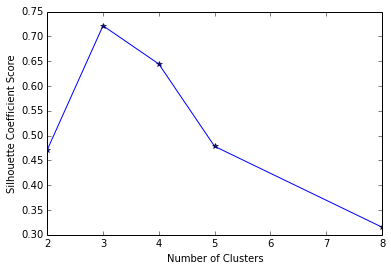

In [33]:
plt.plot(clusters, sc_scores,'*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()

In [34]:
from scipy.spatial.distance import cdist

In [51]:
#使用均匀分布函数随机三个簇，每个10个样本
cluster1 = np.random.uniform(5,15,(2,10))
cluster2 = np.random.uniform(55,65,(2,10))
cluster3 = np.random.uniform(35,45,(2,10))

In [37]:
#绘制30个数据样本的分布图像
X=np.hstack((cluster1,cluster2,cluster3))

In [38]:
X

array([[ 1.28600192,  0.8485312 ,  1.34406422,  1.1163339 ,  0.67541803,
         0.80242334,  0.72691934,  1.1640541 ,  0.56663667,  0.69349049,
         6.09010394,  6.3401809 ,  6.3397448 ,  5.98153699,  6.10681759,
         5.70601182,  5.54882011,  5.56655686,  5.61394002,  5.99704258,
         3.82811531,  3.94689521,  3.9975668 ,  3.7531011 ,  3.58777756,
         3.90755793,  4.06945004,  4.06648043,  3.99454492,  4.09264447],
       [ 1.39709414,  1.10872917,  0.97124146,  0.88234763,  1.25274393,
         0.59347155,  0.85089681,  1.09675432,  1.15178532,  1.25109913,
         6.43151041,  6.4298607 ,  6.45276557,  6.18723749,  5.70790896,
         6.36031912,  5.62770569,  6.18665773,  5.85017161,  5.52860609,
         3.55426974,  4.15074908,  3.82041377,  4.48434513,  4.25089974,
         3.7135369 ,  4.08399628,  3.62924781,  3.86921546,  3.94085738]])

In [39]:
X = X.T

In [40]:
X

array([[ 1.28600192,  1.39709414],
       [ 0.8485312 ,  1.10872917],
       [ 1.34406422,  0.97124146],
       [ 1.1163339 ,  0.88234763],
       [ 0.67541803,  1.25274393],
       [ 0.80242334,  0.59347155],
       [ 0.72691934,  0.85089681],
       [ 1.1640541 ,  1.09675432],
       [ 0.56663667,  1.15178532],
       [ 0.69349049,  1.25109913],
       [ 6.09010394,  6.43151041],
       [ 6.3401809 ,  6.4298607 ],
       [ 6.3397448 ,  6.45276557],
       [ 5.98153699,  6.18723749],
       [ 6.10681759,  5.70790896],
       [ 5.70601182,  6.36031912],
       [ 5.54882011,  5.62770569],
       [ 5.56655686,  6.18665773],
       [ 5.61394002,  5.85017161],
       [ 5.99704258,  5.52860609],
       [ 3.82811531,  3.55426974],
       [ 3.94689521,  4.15074908],
       [ 3.9975668 ,  3.82041377],
       [ 3.7531011 ,  4.48434513],
       [ 3.58777756,  4.25089974],
       [ 3.90755793,  3.7135369 ],
       [ 4.06945004,  4.08399628],
       [ 4.06648043,  3.62924781],
       [ 3.99454492,

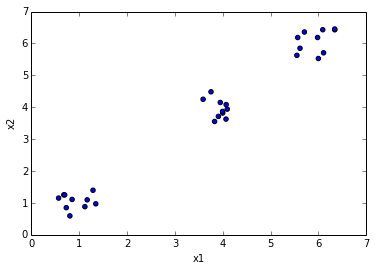

In [42]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [43]:
#测试9中不同聚类中心数量下，每种情况的聚类质量并作图
K = range(0,10)

In [49]:
meandistortions=[]
X

array([[ 1.28600192,  1.39709414],
       [ 0.8485312 ,  1.10872917],
       [ 1.34406422,  0.97124146],
       [ 1.1163339 ,  0.88234763],
       [ 0.67541803,  1.25274393],
       [ 0.80242334,  0.59347155],
       [ 0.72691934,  0.85089681],
       [ 1.1640541 ,  1.09675432],
       [ 0.56663667,  1.15178532],
       [ 0.69349049,  1.25109913],
       [ 6.09010394,  6.43151041],
       [ 6.3401809 ,  6.4298607 ],
       [ 6.3397448 ,  6.45276557],
       [ 5.98153699,  6.18723749],
       [ 6.10681759,  5.70790896],
       [ 5.70601182,  6.36031912],
       [ 5.54882011,  5.62770569],
       [ 5.56655686,  6.18665773],
       [ 5.61394002,  5.85017161],
       [ 5.99704258,  5.52860609],
       [ 3.82811531,  3.55426974],
       [ 3.94689521,  4.15074908],
       [ 3.9975668 ,  3.82041377],
       [ 3.7531011 ,  4.48434513],
       [ 3.58777756,  4.25089974],
       [ 3.90755793,  3.7135369 ],
       [ 4.06945004,  4.08399628],
       [ 4.06648043,  3.62924781],
       [ 3.99454492,

In [48]:
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'), axis=1))/X.shape[0])

/Users/wizardholy/soft/dunas/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:88: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer